# Loan Default Prediction - Exploratory Data Analysis

## Project Overview
This notebook performs comprehensive exploratory data analysis on the LendingClub loan dataset to understand patterns in loan defaults.

**Business Objective:** Predict whether a customer will default on a loan to help financial institutions reduce risk.

---

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Dataset

In [3]:
# Load the dataset
df = pd.read_csv('../data/accepted_2007_to_2018Q4.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Shape: (2260701, 151)
Total Records: 2,260,701
Total Features: 151

Memory Usage: 6353.39 MB


In [4]:
# First look at the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,...,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,...,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,...,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,...,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


## 2. Define Target Variable

We'll create a binary target variable:
- **Default (1)**: Charged Off, Late (31-120 days), Default
- **Non-Default (0)**: Fully Paid, Current

In [6]:
# Check loan status distribution
print("Loan Status Distribution:")
print(df['loan_status'].value_counts())
print(f"\nUnique loan statuses: {df['loan_status'].nunique()}")

Loan Status Distribution:
loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

Unique loan statuses: 9


In [7]:
# Create target variable
default_status = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']
df['default'] = df['loan_status'].isin(default_status).astype(int)

# Filter to only completed loans (Fully Paid or Charged Off)
df_completed = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

print(f"\nTarget Variable Distribution:")
print(df_completed['default'].value_counts())
print(f"\nDefault Rate: {df_completed['default'].mean()*100:.2f}%")
print(f"Completed Loans: {len(df_completed):,}")


Target Variable Distribution:
default
0    1076751
1     268559
Name: count, dtype: int64

Default Rate: 19.96%
Completed Loans: 1,345,310


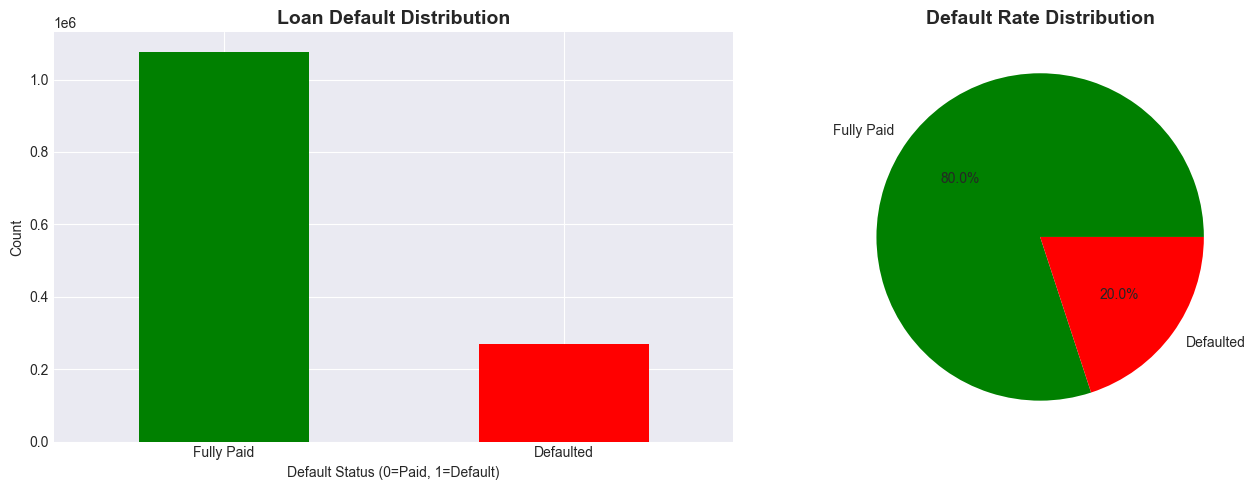


⚠️ Class Imbalance Detected: 80.0% vs 20.0%


In [8]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_completed['default'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Loan Default Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Default Status (0=Paid, 1=Default)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Fully Paid', 'Defaulted'], rotation=0)

# Pie chart
df_completed['default'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                           colors=['green', 'red'], labels=['Fully Paid', 'Defaulted'])
axes[1].set_title('Default Rate Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\n⚠️ Class Imbalance Detected: {(1-df_completed['default'].mean())*100:.1f}% vs {df_completed['default'].mean()*100:.1f}%")

## 3. Data Quality Assessment

In [9]:
# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df_completed.columns,
    'Missing_Count': df_completed.isnull().sum(),
    'Missing_Percentage': (df_completed.isnull().sum() / len(df_completed) * 100)
}).sort_values('Missing_Percentage', ascending=False)

missing_data = missing_data[missing_data['Missing_Count'] > 0]
print(f"Columns with missing values: {len(missing_data)}")
print("\nTop 20 columns with highest missing values:")
print(missing_data.head(20))

Columns with missing values: 105

Top 20 columns with highest missing values:
                                                                                Column  \
next_pymnt_d                                                              next_pymnt_d   
member_id                                                                    member_id   
orig_projected_additional_accrued_interest  orig_projected_additional_accrued_interest   
hardship_type                                                            hardship_type   
hardship_reason                                                        hardship_reason   
hardship_status                                                        hardship_status   
deferral_term                                                            deferral_term   
hardship_amount                                                        hardship_amount   
hardship_start_date                                                hardship_start_date   
payment_plan_start_dat

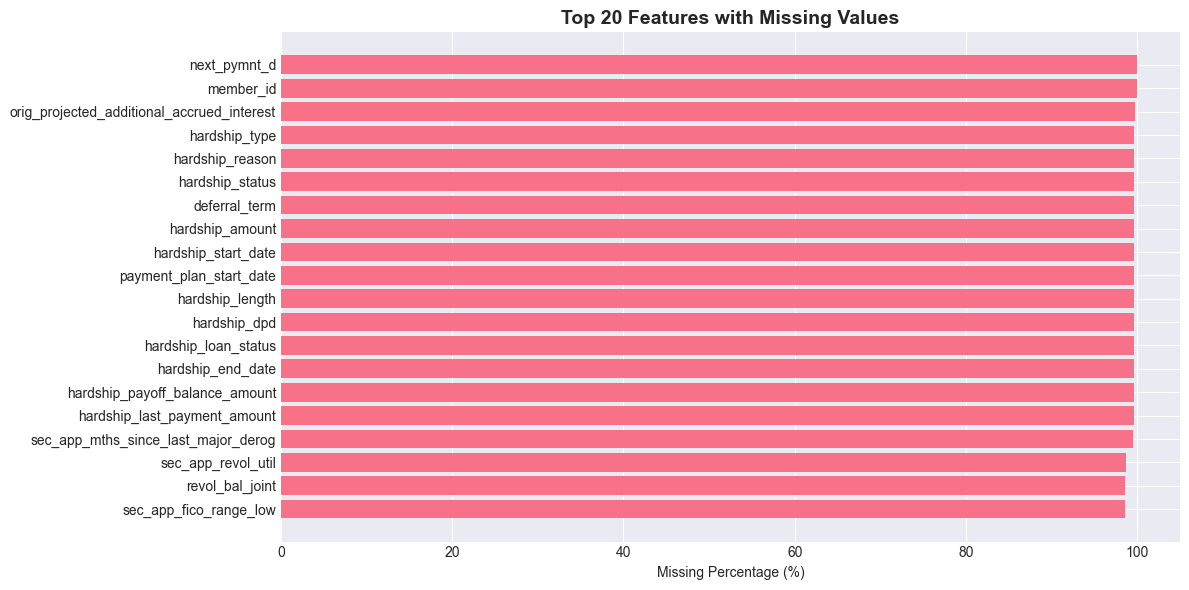

In [10]:
# Visualize missing data
plt.figure(figsize=(12, 6))
top_missing = missing_data.head(20)
plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
plt.yticks(range(len(top_missing)), top_missing['Column'])
plt.xlabel('Missing Percentage (%)')
plt.title('Top 20 Features with Missing Values', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 4. Feature Selection

Select relevant features for modeling based on:
- Business relevance
- Data availability
- Predictive power

In [11]:
# Key features for credit risk modeling
important_features = [
    # Loan characteristics
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'term',
    'grade', 'sub_grade', 'purpose', 'home_ownership',
    
    # Borrower profile
    'annual_inc', 'emp_length', 'verification_status',
    
    # Credit history
    'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
    'revol_util', 'total_acc', 'delinq_2yrs', 'inq_last_6mths',
    'mort_acc', 'pub_rec_bankruptcies',
    
    # Geographic
    'addr_state',
    
    # Target
    'default'
]

# Check which features exist
available_features = [f for f in important_features if f in df_completed.columns]
missing_features = [f for f in important_features if f not in df_completed.columns]

print(f"Available features: {len(available_features)}")
print(f"Missing features: {missing_features}")

# Create filtered dataset
df_model = df_completed[available_features].copy()
print(f"\nFiltered dataset shape: {df_model.shape}")

Available features: 25
Missing features: []

Filtered dataset shape: (1345310, 25)


## 5. Univariate Analysis

In [12]:
# Numerical features summary
numerical_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('default')

print(f"Numerical Features: {len(numerical_cols)}")
df_model[numerical_cols].describe()

Numerical Features: 15


,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,delinq_2yrs,inq_last_6mths,mort_acc,pub_rec_bankruptcies
count,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344453e+06,1.345310e+06,1.345310e+06,1.345309e+06,1.298029e+06,1.344613e+06
mean,1.441997e+04,1.441156e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.828267e+01,1.159352e+01,2.152760e-01,1.624811e+04,5.181002e+01,2.498084e+01,3.177944e-01,6.550807e-01,1.670783e+00,1.344439e-01
std,8.717051e+03,8.713118e+03,4.768716e+00,2.615126e+02,6.992510e+04,1.116045e+01,5.473789e+00,6.018647e-01,2.232817e+04,2.452107e+01,1.199847e+01,8.779922e-01,9.377739e-01,2.000444e+00,3.779285e-01
min,5.000000e+02,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,9.750000e+00,2.484800e+02,4.578000e+04,1.179000e+01,8.000000e+00,0.000000e+00,5.943000e+03,3.340000e+01,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.200000e+04,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,1.100000e+01,0.000000e+00,1.113400e+04,5.220000e+01,2.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.000000e+04,2.000000e+04,1.599000e+01,5.807300e+02,9.000000e+04,2.406000e+01,1.400000e+01,0.000000e+00,1.975575e+04,7.070000e+01,3.200000e+01,0.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00
max,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,3.900000e+01,8.000000e+00,5.100000e+01,1.200000e+01


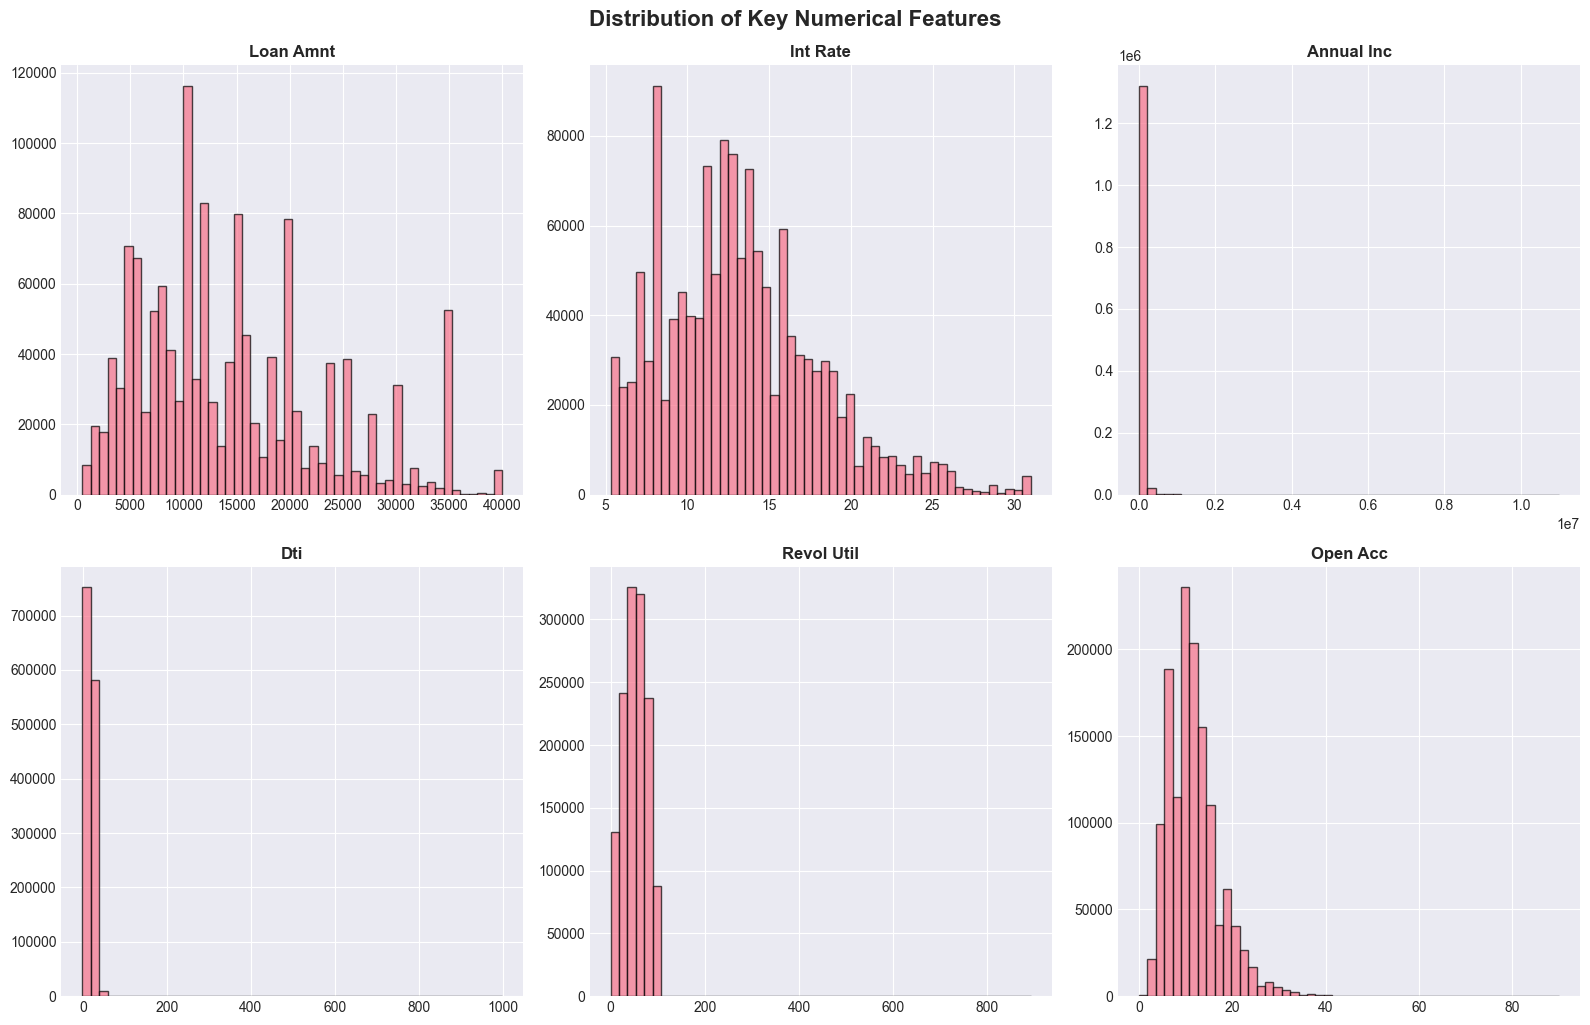

In [13]:
# Visualize key numerical features
key_numeric = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'open_acc']
key_numeric = [col for col in key_numeric if col in df_model.columns]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numeric[:6]):
    df_model[col].hist(bins=50, ax=axes[idx], edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    
plt.tight_layout()
plt.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [14]:
# Categorical features
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features: {len(categorical_cols)}\n")

for col in categorical_cols[:5]:
    print(f"\n{col}:")
    print(df_model[col].value_counts().head(10))

Categorical Features: 9


term:
term
36 months    1020743
60 months     324567
Name: count, dtype: int64

grade:
grade
B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: count, dtype: int64

sub_grade:
sub_grade
C1    85494
B4    83199
B5    82538
B3    81827
C2    79213
C3    74998
C4    74421
B2    74024
B1    71153
C5    67560
Name: count, dtype: int64

purpose:
purpose
debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
Name: count, dtype: int64

home_ownership:
home_ownership
MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: count, dtype: int64


## 6. Bivariate Analysis - Features vs Default

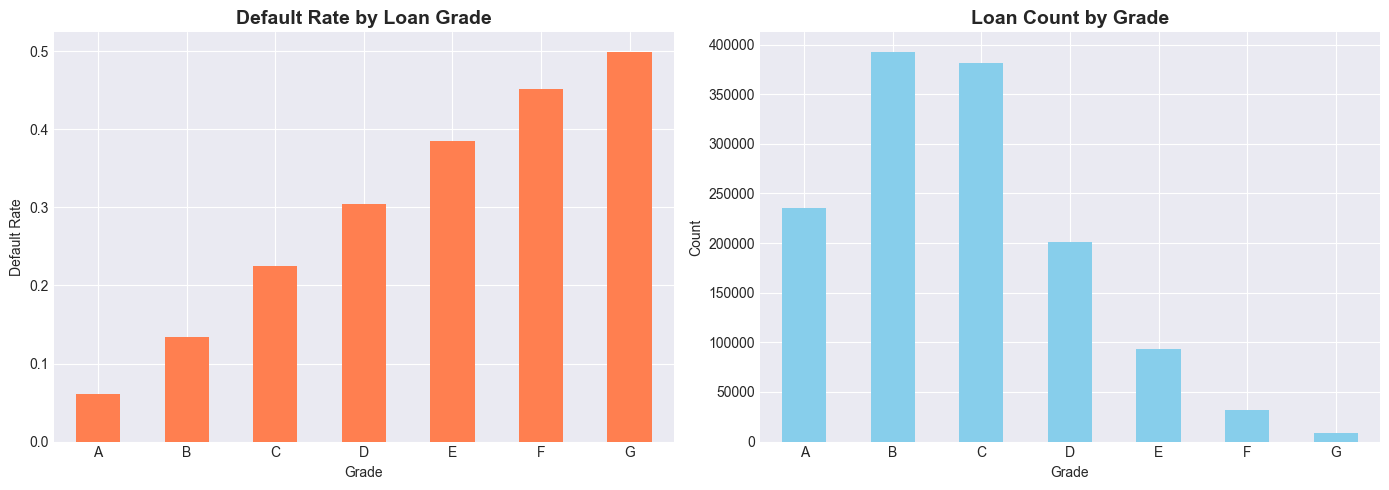


 Key Insight: Default rate increases with lower grades (higher risk)
       Default_Rate   Count
grade                      
A          0.060407  235090
B          0.133852  392741
C          0.224396  381686
D          0.303822  200953
E          0.384784   93650
F          0.452024   32058
G          0.499343    9132


In [16]:
# Default rate by loan grade
if 'grade' in df_model.columns:
    grade_default = df_model.groupby('grade')['default'].agg(['mean', 'count'])
    grade_default.columns = ['Default_Rate', 'Count']
    grade_default = grade_default.sort_index()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Default rate
    grade_default['Default_Rate'].plot(kind='bar', ax=axes[0], color='coral')
    axes[0].set_title('Default Rate by Loan Grade', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Grade')
    axes[0].set_ylabel('Default Rate')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
    
    # Count
    grade_default['Count'].plot(kind='bar', ax=axes[1], color='skyblue')
    axes[1].set_title('Loan Count by Grade', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Grade')
    axes[1].set_ylabel('Count')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    print("\n Key Insight: Default rate increases with lower grades (higher risk)")
    print(grade_default)

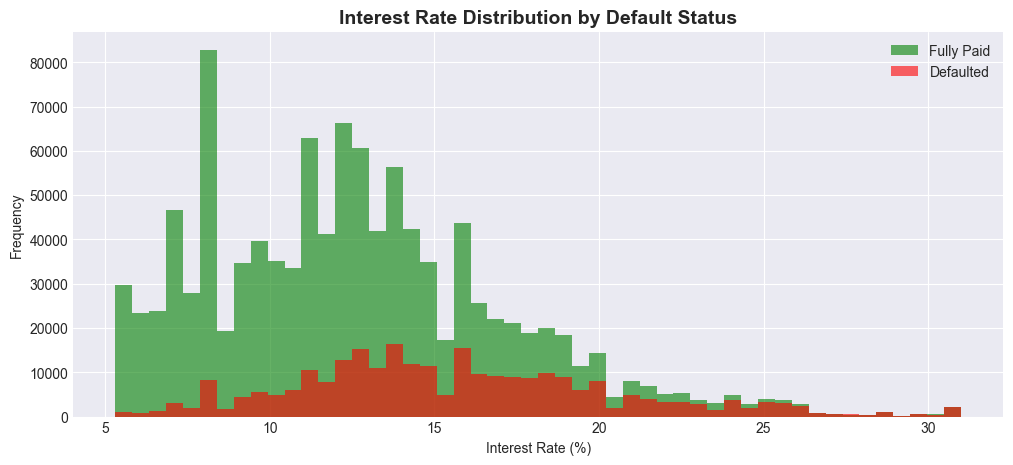

Average interest rate - Fully Paid: 12.62%
Average interest rate - Defaulted: 15.71%

📊 Key Insight: Higher interest rates correlate with higher default risk


In [17]:
# Interest rate distribution by default status
if 'int_rate' in df_model.columns:
    plt.figure(figsize=(12, 5))
    
    df_model[df_model['default']==0]['int_rate'].hist(bins=50, alpha=0.6, label='Fully Paid', color='green')
    df_model[df_model['default']==1]['int_rate'].hist(bins=50, alpha=0.6, label='Defaulted', color='red')
    
    plt.xlabel('Interest Rate (%)')
    plt.ylabel('Frequency')
    plt.title('Interest Rate Distribution by Default Status', fontsize=14, fontweight='bold')
    plt.legend()
    plt.show()
    
    print(f"Average interest rate - Fully Paid: {df_model[df_model['default']==0]['int_rate'].mean():.2f}%")
    print(f"Average interest rate - Defaulted: {df_model[df_model['default']==1]['int_rate'].mean():.2f}%")
    print("\n📊 Key Insight: Higher interest rates correlate with higher default risk")

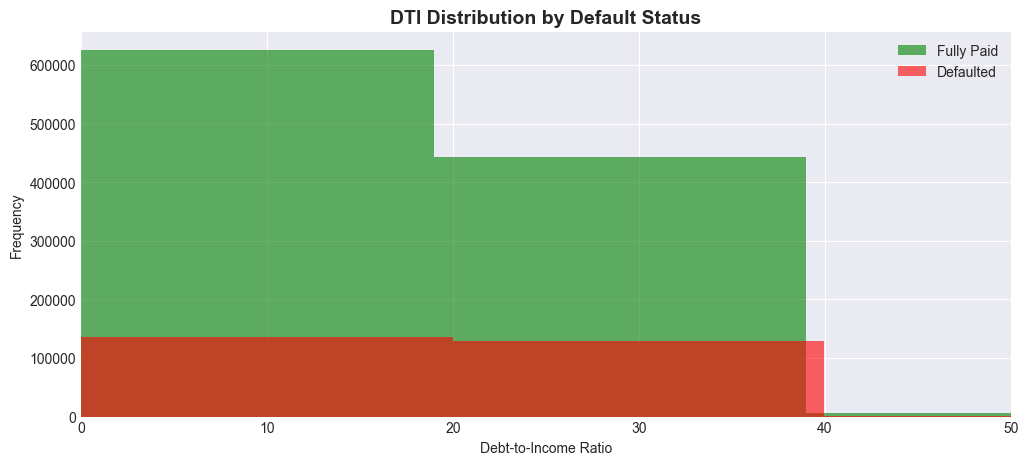

Average DTI - Fully Paid: 17.81
Average DTI - Defaulted: 20.17

📊 Key Insight: Higher DTI indicates higher financial burden and default risk


In [18]:
# DTI (Debt-to-Income) vs Default
if 'dti' in df_model.columns:
    plt.figure(figsize=(12, 5))
    
    df_model[df_model['default']==0]['dti'].hist(bins=50, alpha=0.6, label='Fully Paid', color='green')
    df_model[df_model['default']==1]['dti'].hist(bins=50, alpha=0.6, label='Defaulted', color='red')
    
    plt.xlabel('Debt-to-Income Ratio')
    plt.ylabel('Frequency')
    plt.title('DTI Distribution by Default Status', fontsize=14, fontweight='bold')
    plt.legend()
    plt.xlim(0, 50)
    plt.show()
    
    print(f"Average DTI - Fully Paid: {df_model[df_model['default']==0]['dti'].mean():.2f}")
    print(f"Average DTI - Defaulted: {df_model[df_model['default']==1]['dti'].mean():.2f}")
    print("\n📊 Key Insight: Higher DTI indicates higher financial burden and default risk")

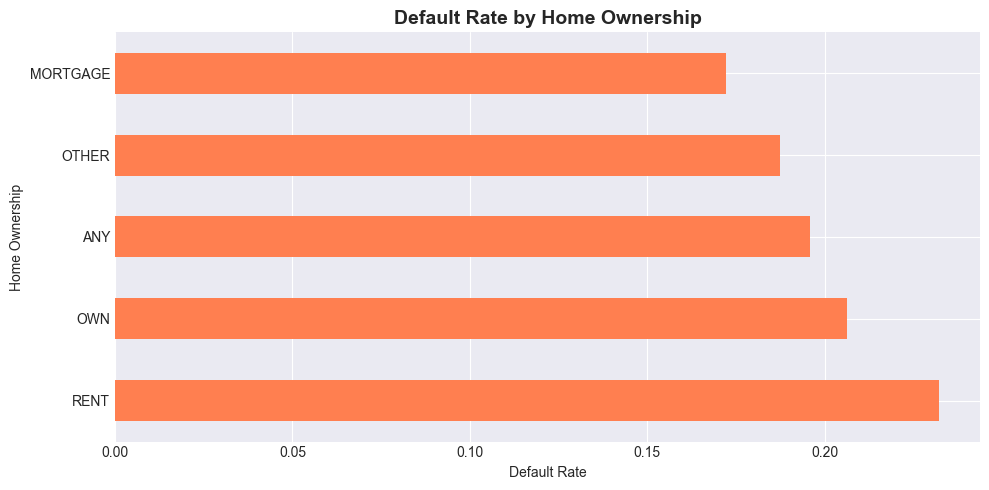

                Default_Rate   Count
home_ownership                      
RENT                0.232165  534421
OWN                 0.206198  144832
ANY                 0.195804     286
OTHER               0.187500     144
MORTGAGE            0.172077  665579


In [19]:
# Home ownership vs Default
if 'home_ownership' in df_model.columns:
    home_default = df_model.groupby('home_ownership')['default'].agg(['mean', 'count'])
    home_default.columns = ['Default_Rate', 'Count']
    home_default = home_default[home_default['Count'] > 100].sort_values('Default_Rate', ascending=False)
    
    plt.figure(figsize=(10, 5))
    home_default['Default_Rate'].plot(kind='barh', color='coral')
    plt.xlabel('Default Rate')
    plt.ylabel('Home Ownership')
    plt.title('Default Rate by Home Ownership', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(home_default)

## 7. Correlation Analysis

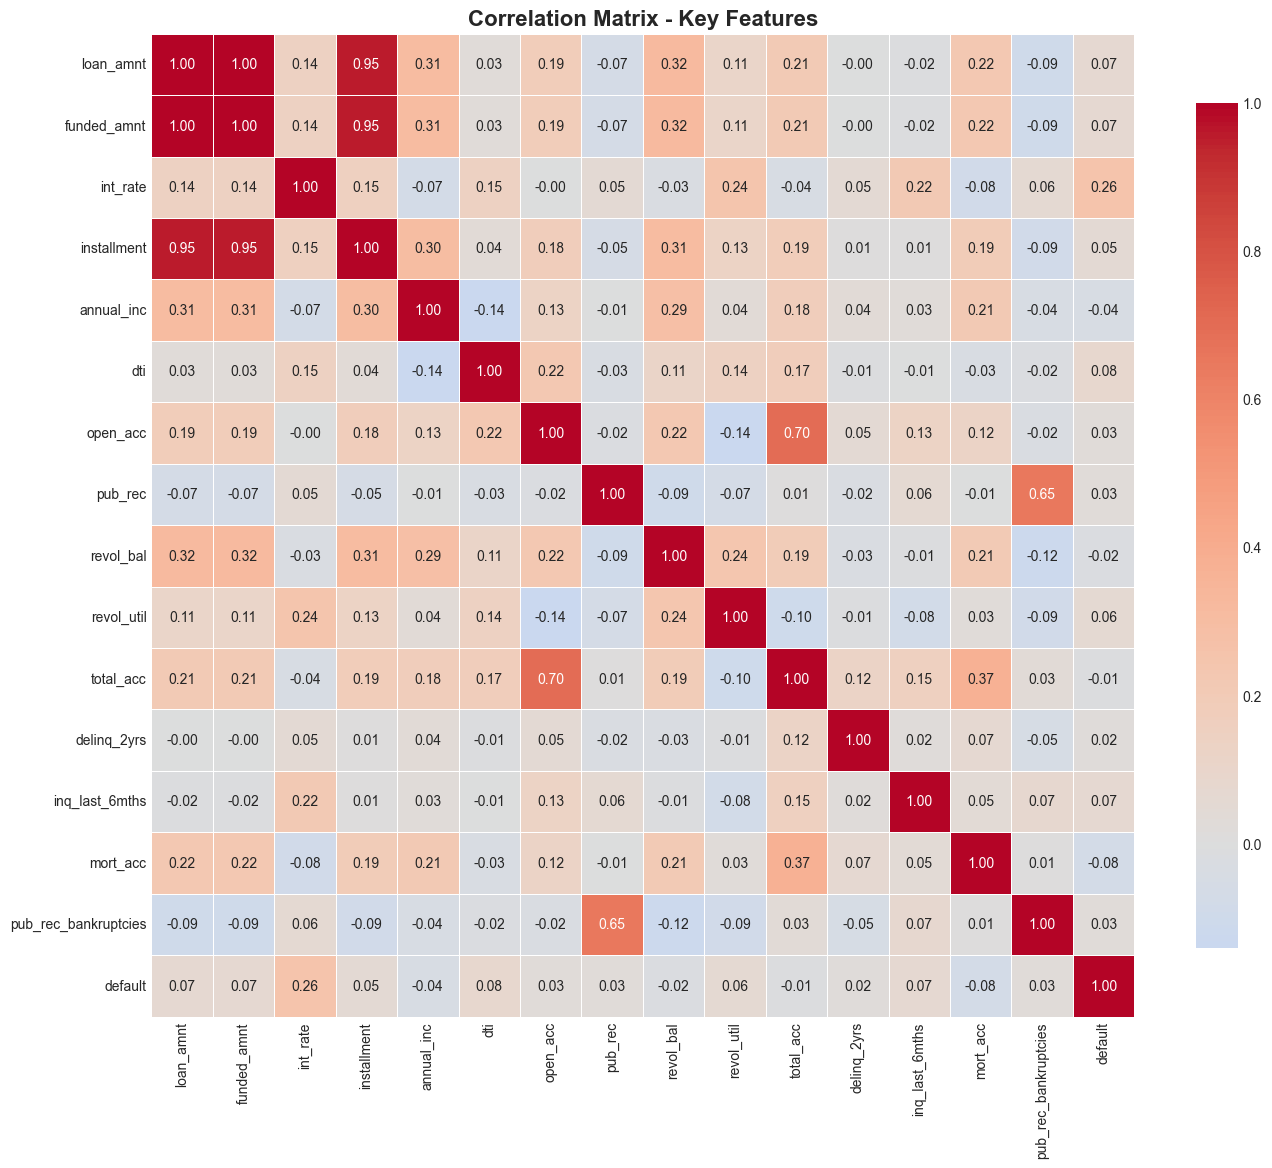

In [20]:
# Correlation matrix for numerical features
corr_features = [col for col in numerical_cols if df_model[col].notna().sum() > len(df_model) * 0.5]
corr_matrix = df_model[corr_features + ['default']].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Key Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Features most correlated with Default:

int_rate                0.258792
dti                     0.084510
funded_amnt             0.065658
loan_amnt               0.065604
inq_last_6mths          0.065454
revol_util              0.060048
installment             0.051701
open_acc                0.028078
pub_rec                 0.026194
pub_rec_bankruptcies    0.025308
delinq_2yrs             0.019381
total_acc              -0.011300
revol_bal              -0.020010
annual_inc             -0.041759
mort_acc               -0.075294
Name: default, dtype: float64


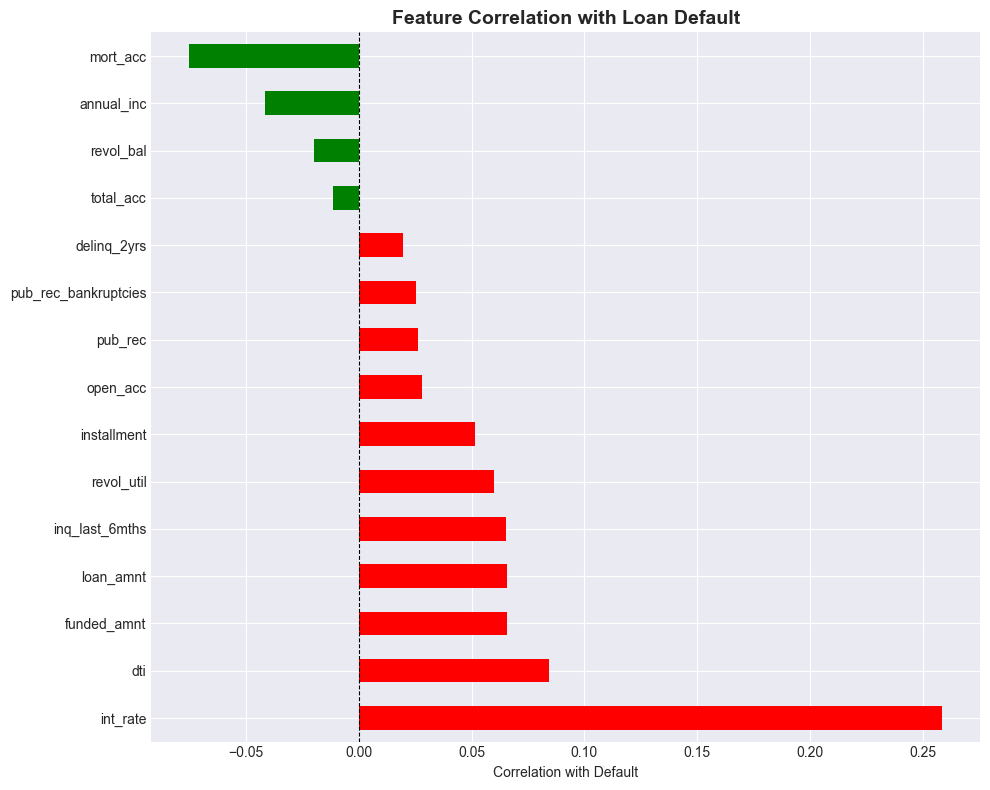

In [21]:
# Correlation with target (default)
target_corr = corr_matrix['default'].drop('default').sort_values(ascending=False)
print("Features most correlated with Default:\n")
print(target_corr)

plt.figure(figsize=(10, 8))
target_corr.plot(kind='barh', color=['green' if x < 0 else 'red' for x in target_corr])
plt.xlabel('Correlation with Default')
plt.title('Feature Correlation with Loan Default', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## 8. Data Preprocessing Strategy

Based on EDA findings, we'll implement:

1. **Handle Missing Values:**
   - Drop columns with >50% missing
   - Impute remaining with median/mode

2. **Feature Engineering:**
   - Extract year from dates
   - Create credit history length
   - Parse employment length

3. **Encoding:**
   - Target encoding for high-cardinality categoricals
   - One-hot encoding for low-cardinality

4. **Handle Imbalance:**
   - Use `scale_pos_weight` in XGBoost
   - Focus on ROC-AUC and PR-AUC metrics

In [22]:
# Save processed dataset for modeling
df_model.to_csv('../data/processed.csv', index=False)
print(f"✅ Processed data saved: {df_model.shape}")
print(f"Features: {df_model.shape[1]-1}")
print(f"Target: default")
print(f"Default rate: {df_model['default'].mean()*100:.2f}%")

✅ Processed data saved: (1345310, 25)
Features: 24
Target: default
Default rate: 19.96%


## 9. Key Findings Summary

### Business Insights:

1. **Default Rate:** ~20% of completed loans default
2. **Risk Indicators:**
   - Higher interest rates → Higher default risk
   - Higher DTI ratio → Higher default risk
   - Lower loan grades (E, F, G) → Higher default risk
   - Recent delinquencies → Strong predictor

3. **Class Imbalance:** Significant imbalance requires careful handling

4. **Feature Quality:** Most important features have good data quality

### Next Steps:
- Proceed to modeling with XGBoost
- Implement feature engineering
- Apply SMOTE or class weights for imbalance
- Focus on ROC-AUC and business metrics